## Data processing and analysis of drone sound data 

This notebook provide data processing of drone sound data which recorded by Zoom H4N. The recording takes place on different two positions, namely free-filed area from the drone and on bottom of (mounted to) the drone. 

In [1]:
# import all necessary packages
import numpy as np 
import matplotlib.pyplot as plt
from os.path import join
import soundfile
from scipy.signal import welch, periodogram

In [2]:
# import background noise and drone sound audio data
data_dir = "trial_data"
bn_file = "bn_ws_g50_ff.wav"
drone_mounted_file = "drone_ws_g20_mounted.wav"
drone_ff_file = "drone_ws_g50_ff.wav"

bn_filename = join(data_dir, bn_file)
dm_filename = join(data_dir, drone_mounted_file)
df_filename = join(data_dir, drone_ff_file)

bn, fs = soundfile.read(file=bn_filename, dtype='float32')
dm, fs = soundfile.read(file=dm_filename, dtype='float32')
df, fs = soundfile.read(file=df_filename, dtype='float32')

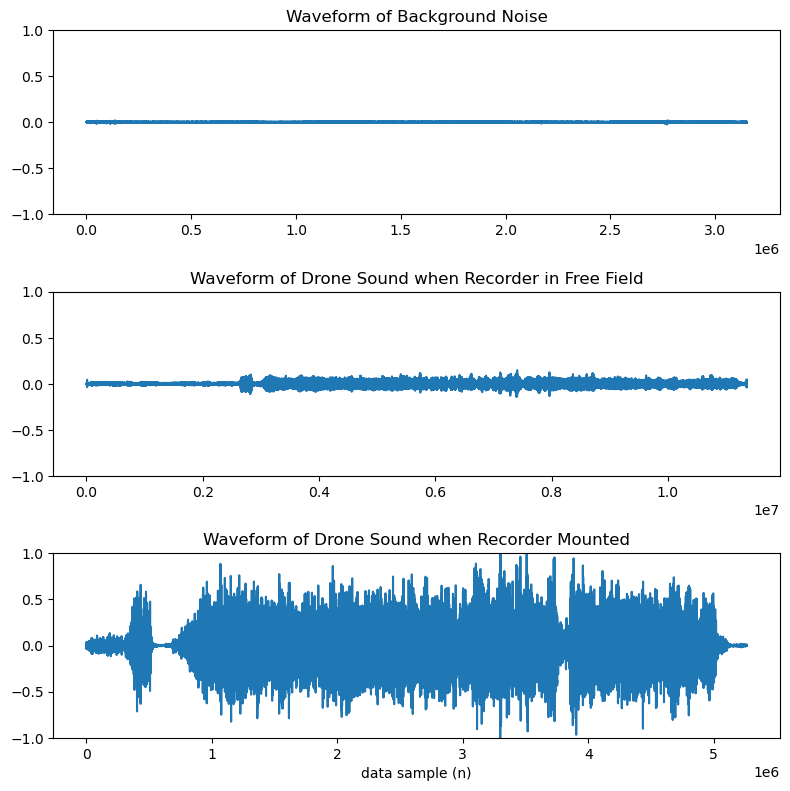

In [66]:
# plot the time domain data from the signal
fig, ax = plt.subplots(figsize=(8,8), nrows=3, ncols=1)

ax[0].plot(bn[:,0])
ax[0].set_title('Waveform of Background Noise')
ax[0].set_ylim([-1, 1])

ax[1].plot(df[:,0])
ax[1].set_title('Waveform of Drone Sound when Recorder in Free Field')
ax[1].set_ylim([-1, 1])

ax[2].plot(dm[:,0])
ax[2].set_title('Waveform of Drone Sound when Recorder Mounted')
ax[2].set_ylim([-1, 1])

plt.tight_layout()
plt.xlabel('data sample (n)')
plt.show()

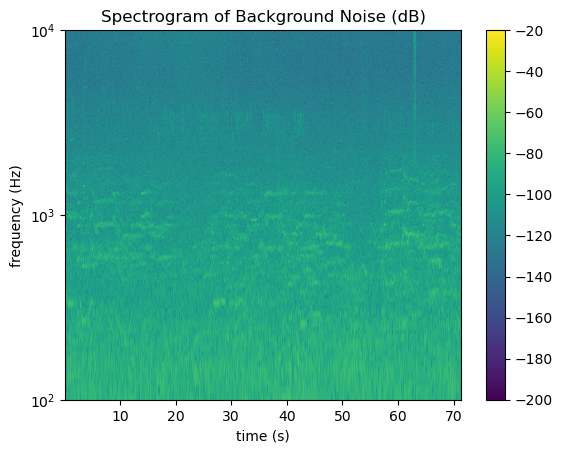

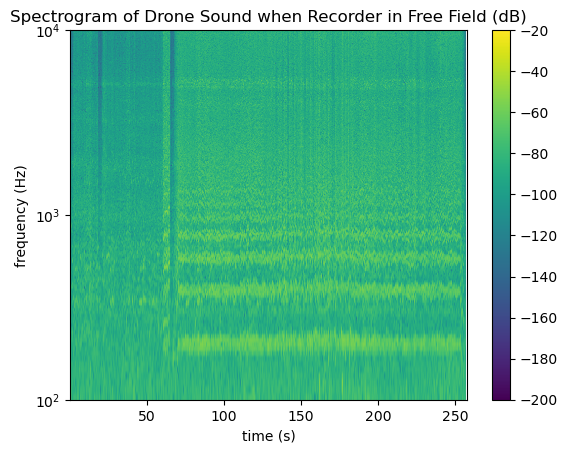

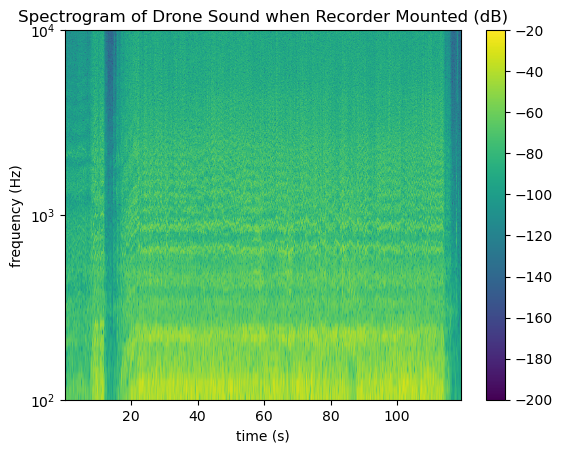

In [58]:
plt.specgram(bn[:,0], Fs=fs, NFFT=4096, noverlap=2048)
plt.yscale('symlog')
plt.ylim([100, 10000])
plt.colorbar()
plt.clim(-200, -20)
plt.xlabel('time (s)')
plt.ylabel('frequency (Hz)')
plt.title('Spectrogram of Background Noise (dB)')
plt.show()

plt.specgram(df[:,0], Fs=fs, NFFT=4096, noverlap=2048)
plt.yscale('symlog')
plt.ylim([100, 10000])
plt.colorbar()
plt.clim(-200, -20)
plt.xlabel('time (s)')
plt.ylabel('frequency (Hz)')
plt.title('Spectrogram of Drone Sound when Recorder in Free Field (dB)')
plt.show()

plt.specgram(dm[:,0], Fs=fs, NFFT=4096, noverlap=2048)
plt.yscale('symlog')
plt.ylim([100, 10000])
plt.colorbar()
plt.clim(-200, -20)
plt.xlabel('time (s)')
plt.ylabel('frequency (Hz)')
plt.title('Spectrogram of Drone Sound when Recorder Mounted (dB)')
plt.show()



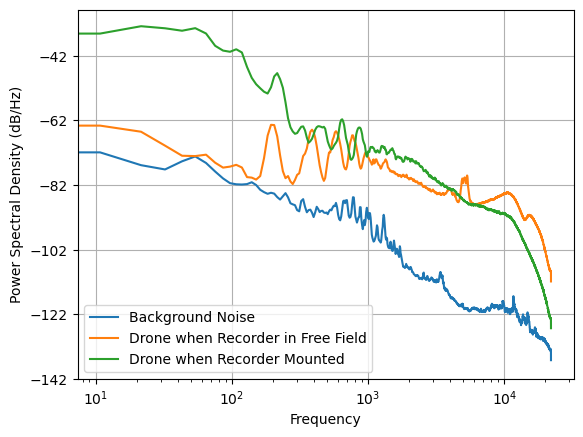

In [57]:
plt.psd(bn[:,0], Fs=fs, NFFT=4096, noverlap=2048)
plt.psd(df[:,0], Fs=fs, NFFT=4096, noverlap=2048)
plt.psd(dm[:,0], Fs=fs, NFFT=4096, noverlap=2048)
plt.legend(['Background Noise', 'Drone when Recorder in Free Field', 'Drone when Recorder Mounted'])
plt.xscale('log')

plt.show()